import libraries and read data

In [34]:
# !pip uninstall eodal -y
# !pip install git+https://github.com/lukasValentin/eodal.git@landsat-dev

In [35]:
# Import general libraries
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

from shapely.geometry import Point
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture

# Import scikit-learn libraries
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
print("Version of scikit-learn: " + sklearn.__version__)

# Import EOdal libraries
import eodal
from eodal.core.band import Band
from eodal.core.raster import RasterCollection

# Print EOdal version
print("Version of EOdal: " + eodal.__version__)

Version of scikit-learn: 1.2.2
Version of EOdal: 0.2.1


In [36]:
year = 2003

In [37]:
# read tif from disk:
fpath_raster = Path('S:\MSc_23_TimckeFinn\data\EOdal\landsat_median_composite_' + str(year) + '.tif')

# initialize a RasterCollection from the .tif file
composite = RasterCollection.from_multi_band_raster(fpath_raster=fpath_raster, 
                                                    band_aliases = ["blue", "green", "red", "nir_1", "swir_1"])
composite.band_summaries()
composite.band_names


['blue_median', 'green_median', 'red_median', 'nir08_median', 'swir16_median']

## Feature extraction

In [38]:
# calculate some SI
composite.calc_si('NDVI', inplace = True)
composite.calc_si('NDWI', inplace = True)
composite.calc_si('EVI', inplace = True)
composite.calc_si('CI_GREEN', inplace = True)
composite.calc_si('MSAVI', inplace = True)
composite.calc_si('BSI', inplace = True)

# print band summaries
composite.band_summaries()

,min,mean,std,max,count,geometry,band_name
0,0.078270,0.083210,0.001912,0.093590,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",blue_median
1,0.082830,0.091133,0.002921,0.102940,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",green_median
2,0.078160,0.087398,0.003729,0.105775,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",red_median
3,0.085025,0.177960,0.021257,0.223890,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",nir08_median
4,0.076860,0.131254,0.014245,0.177750,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",swir16_median
5,0.010393,0.336121,0.068067,0.449485,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",NDVI
6,-0.422427,-0.317482,0.066498,0.013938,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",NDWI
7,0.004593,0.209054,0.047050,0.304082,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",EVI
8,-0.027494,0.951932,0.225192,1.462764,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",CI_GREEN
9,0.003065,0.149985,0.034345,0.223706,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",MSAVI


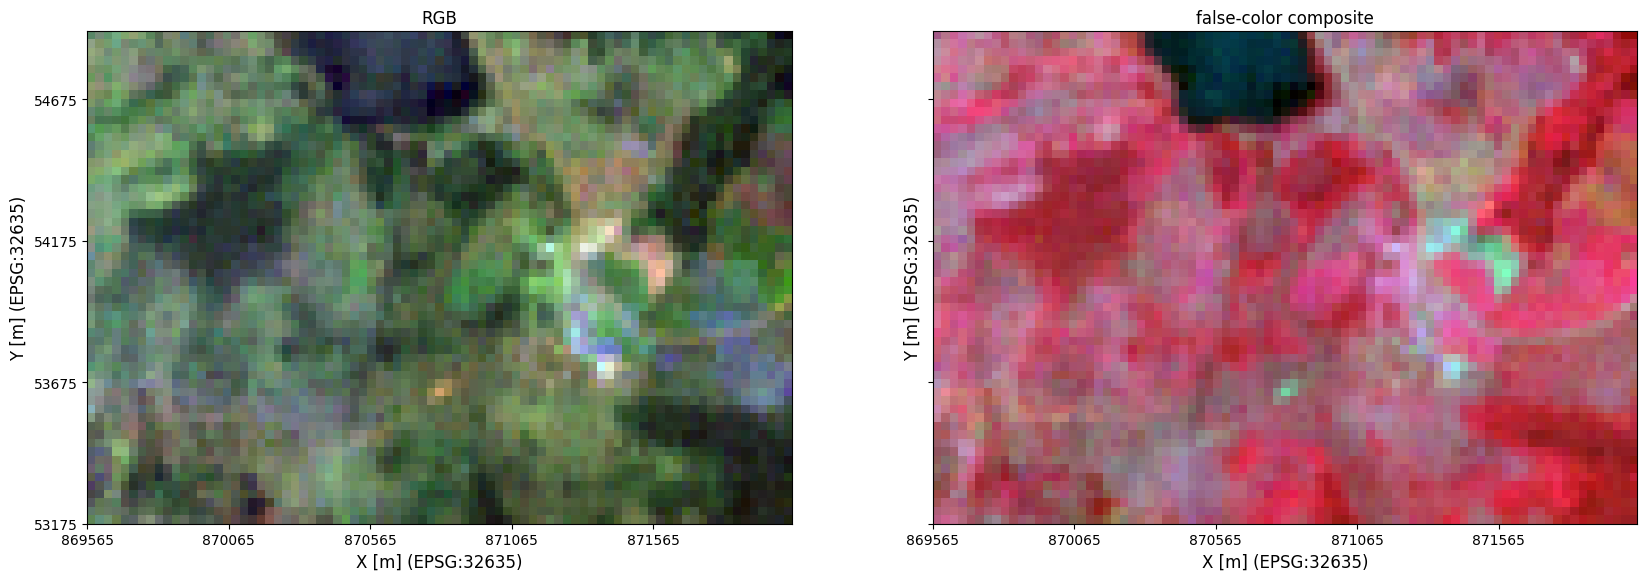

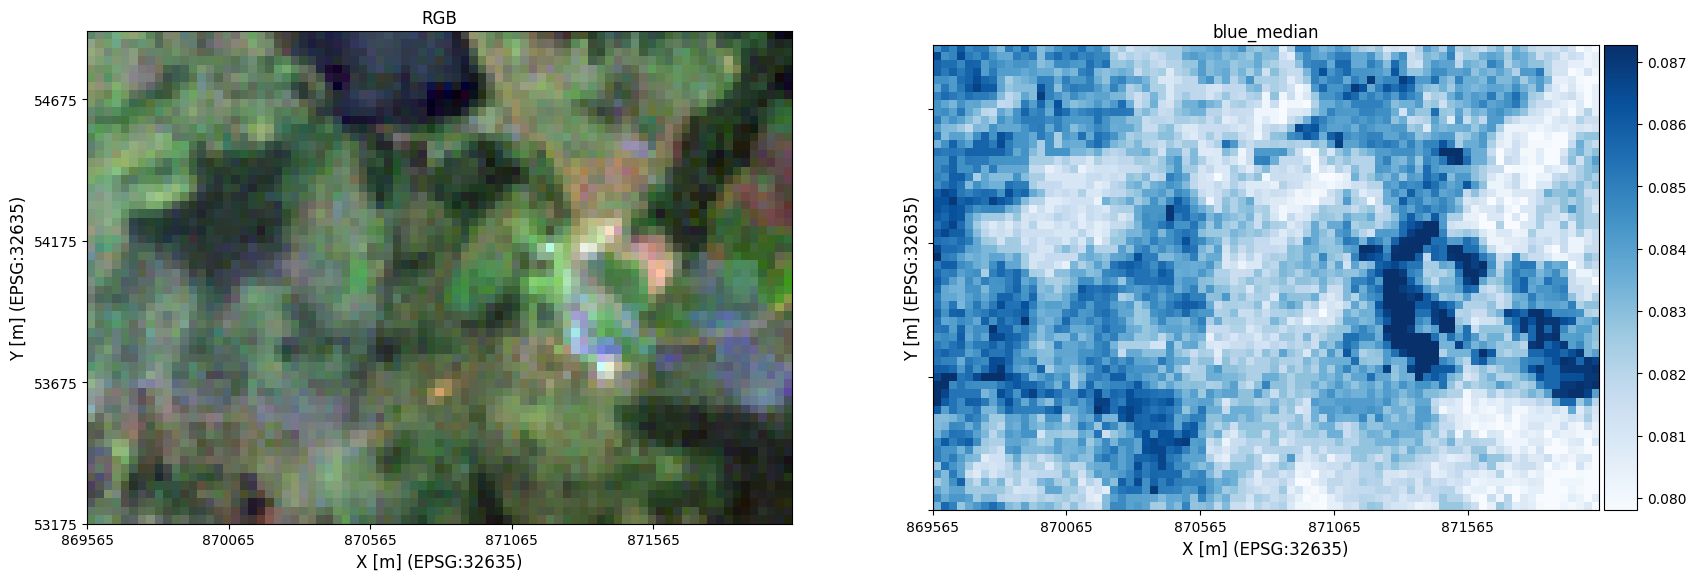

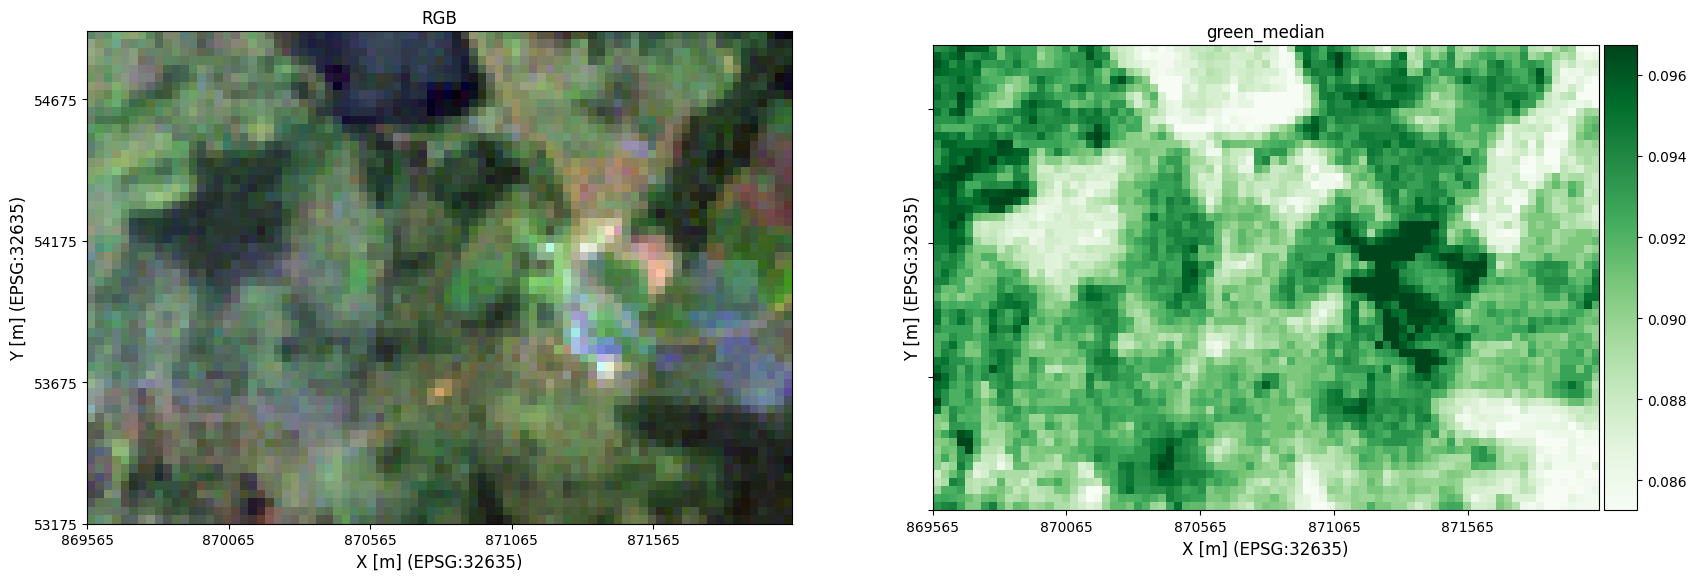

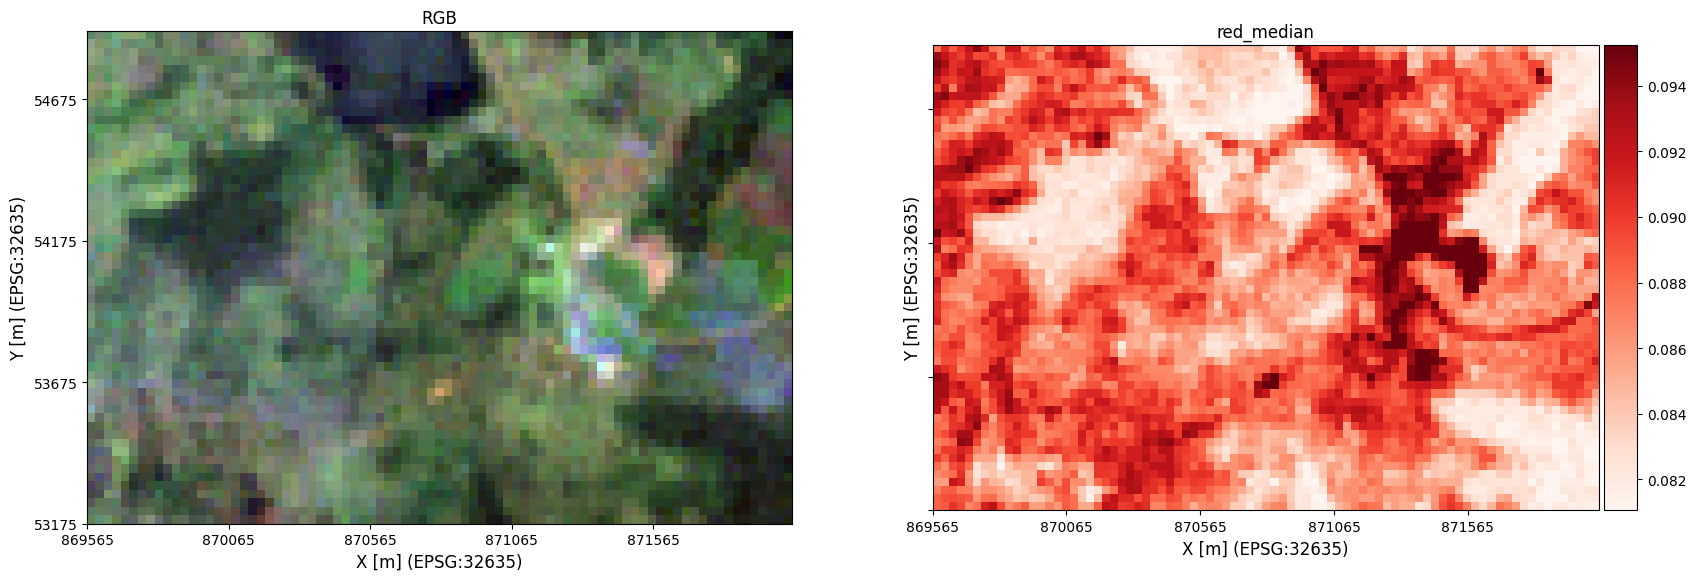

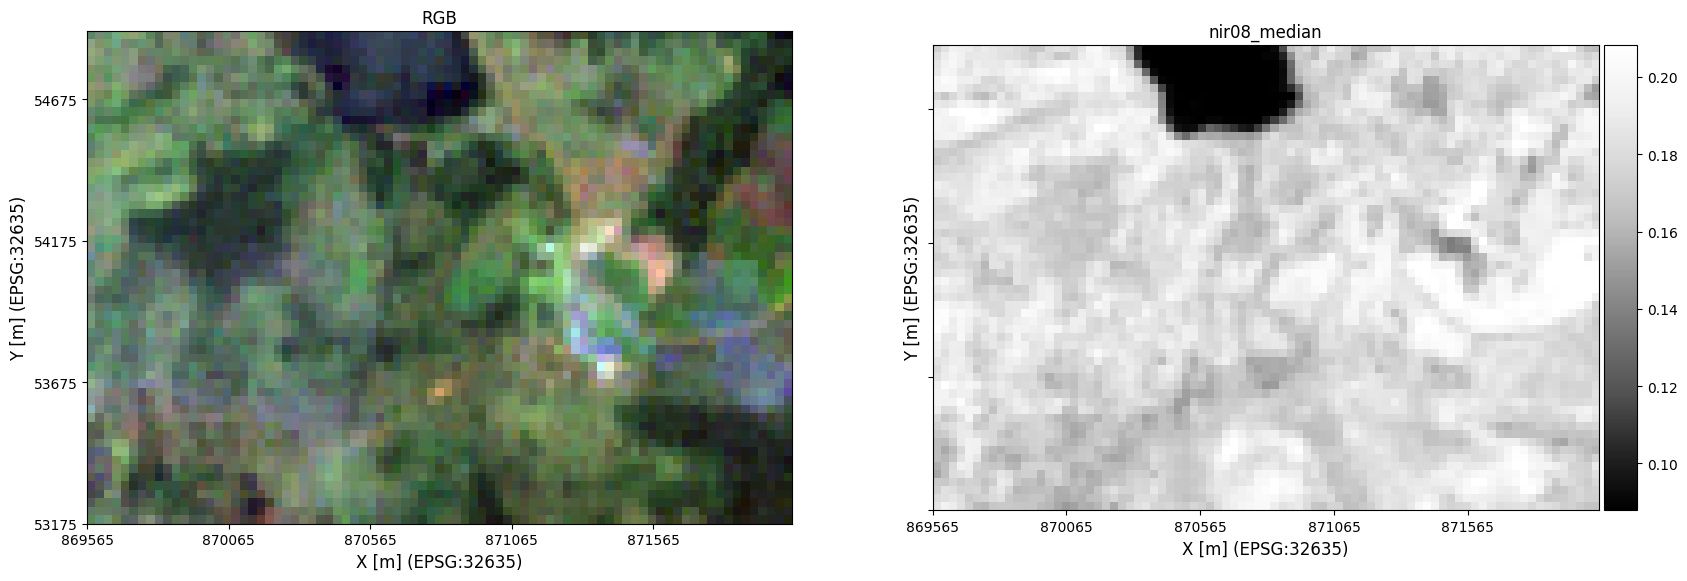

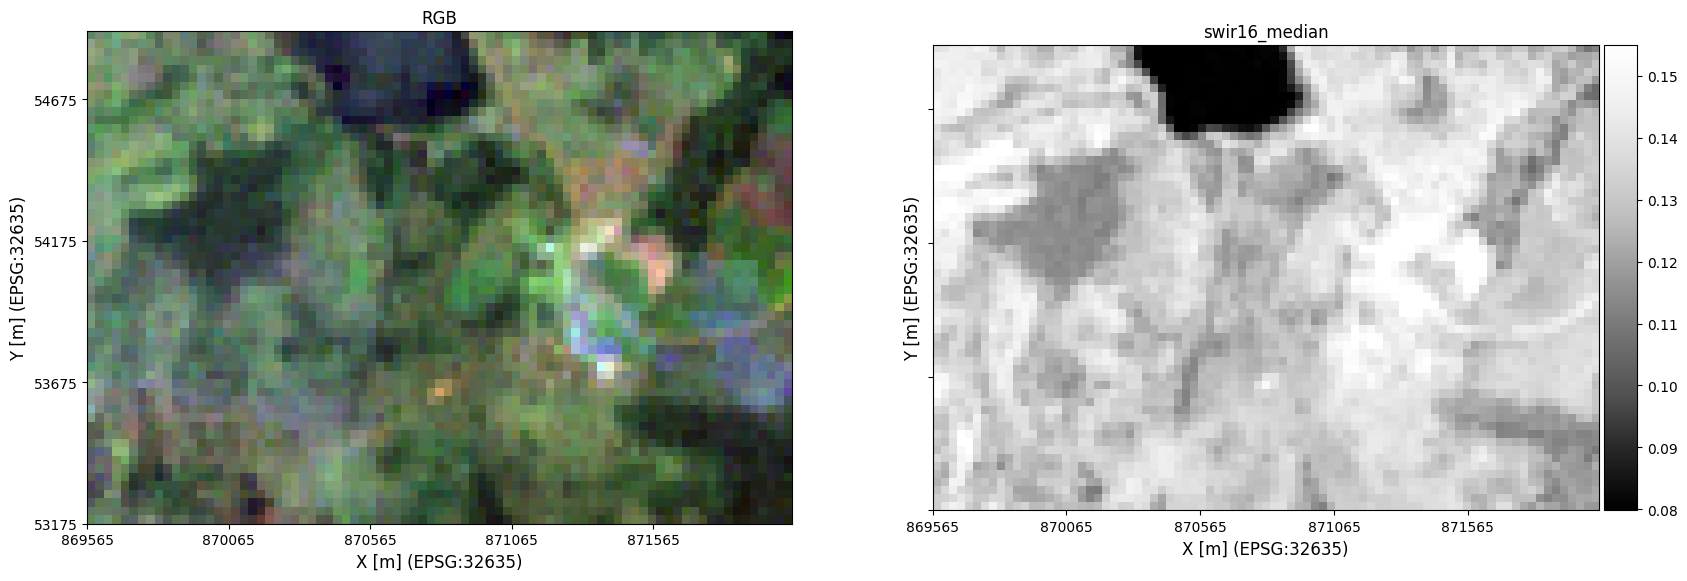

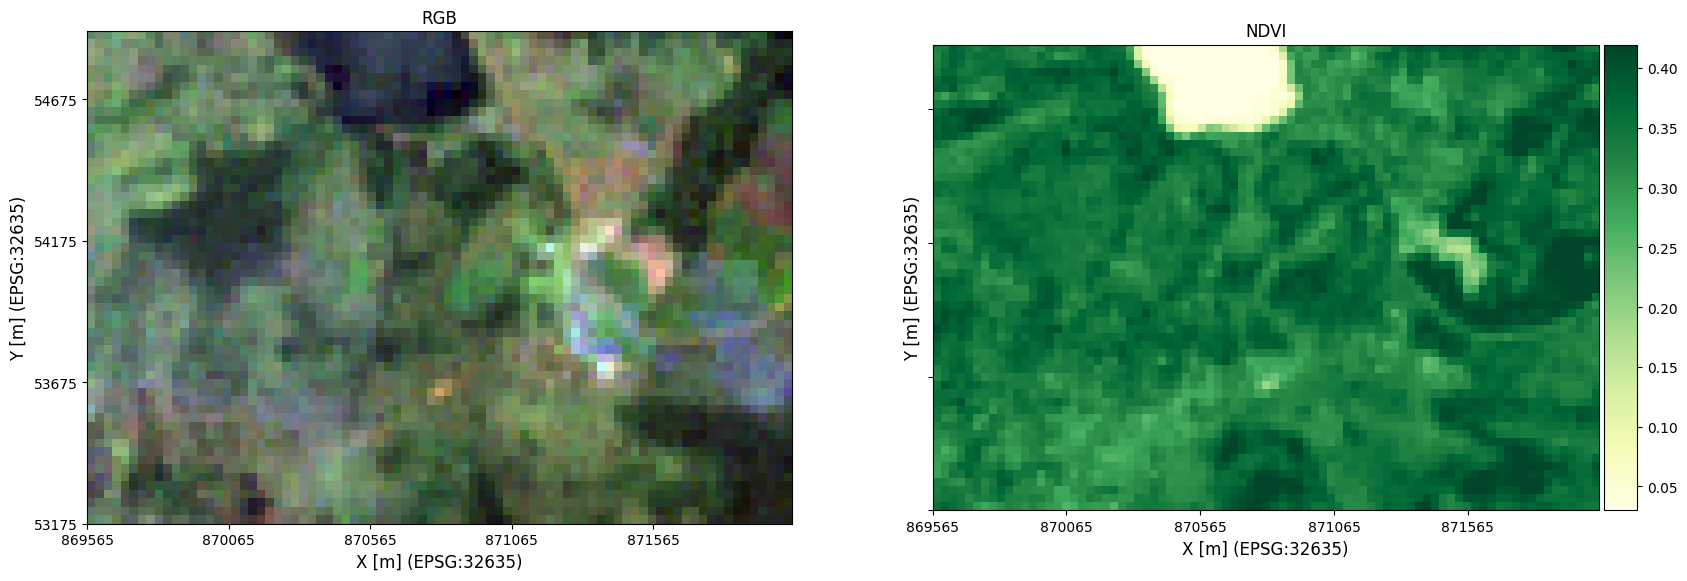

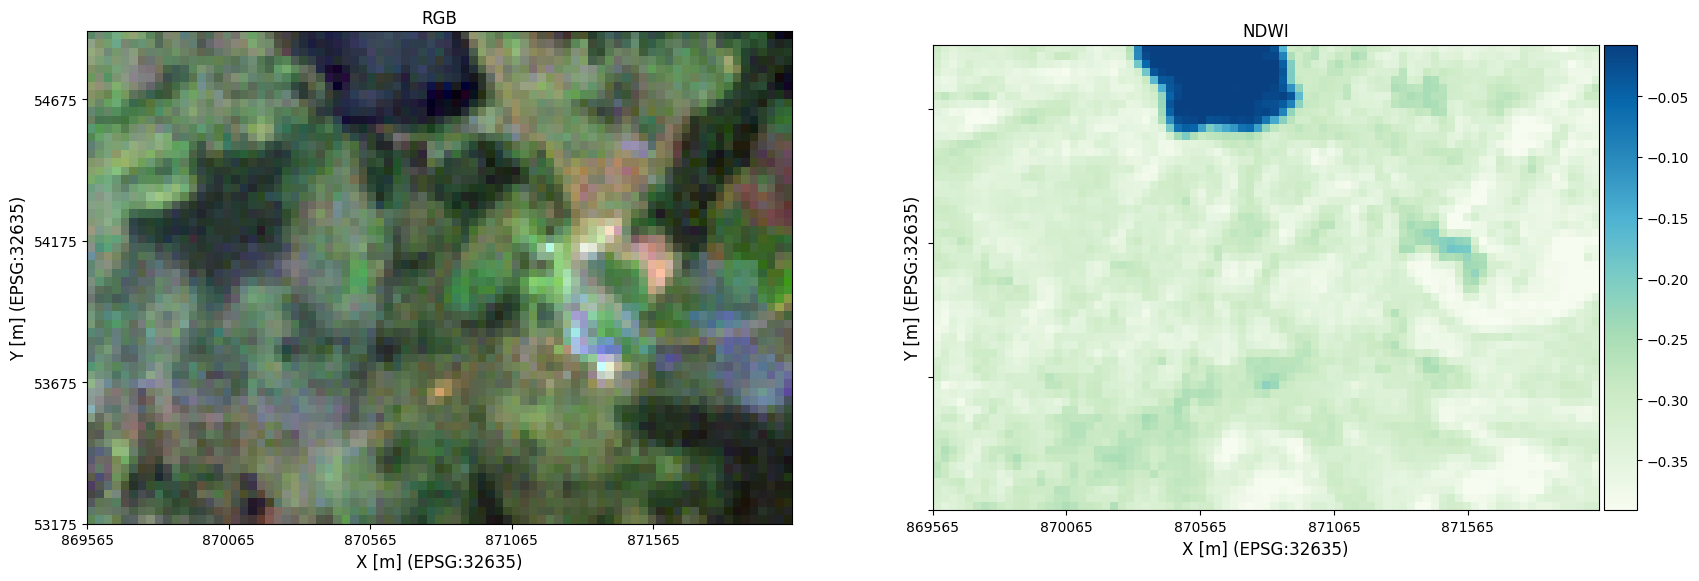

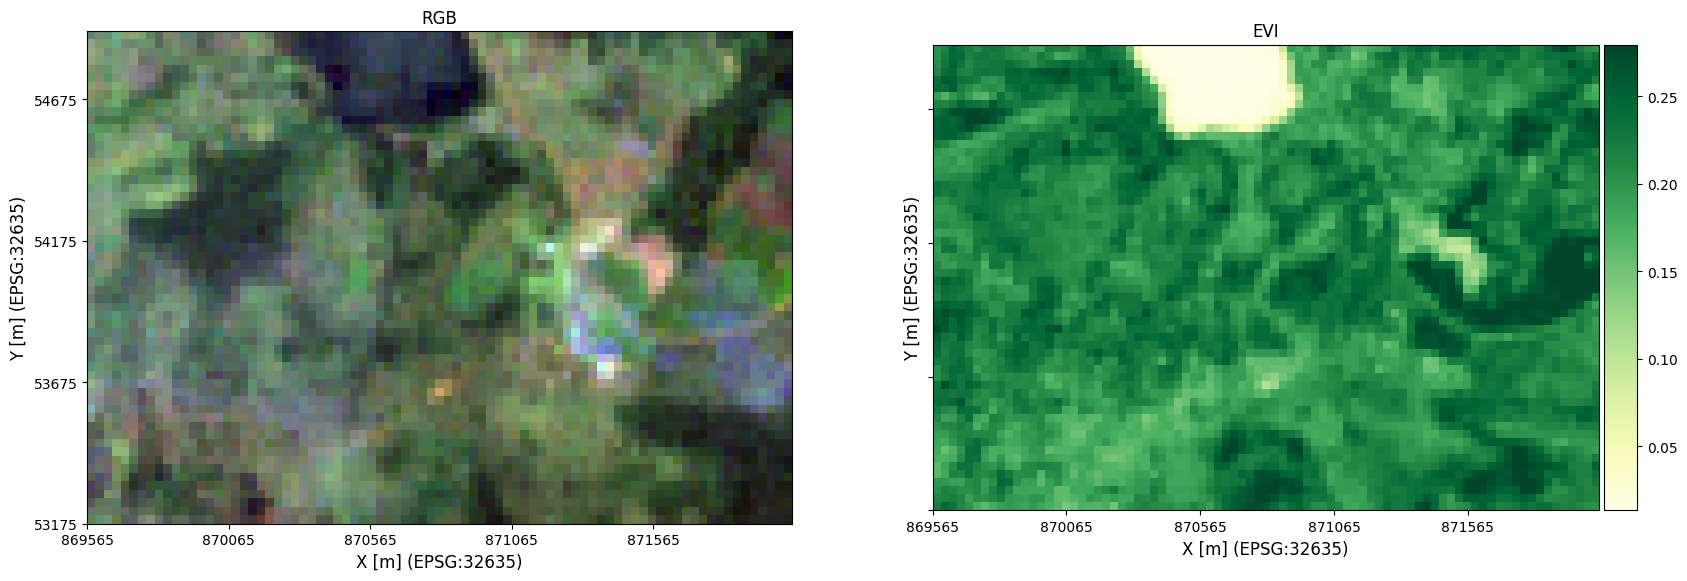

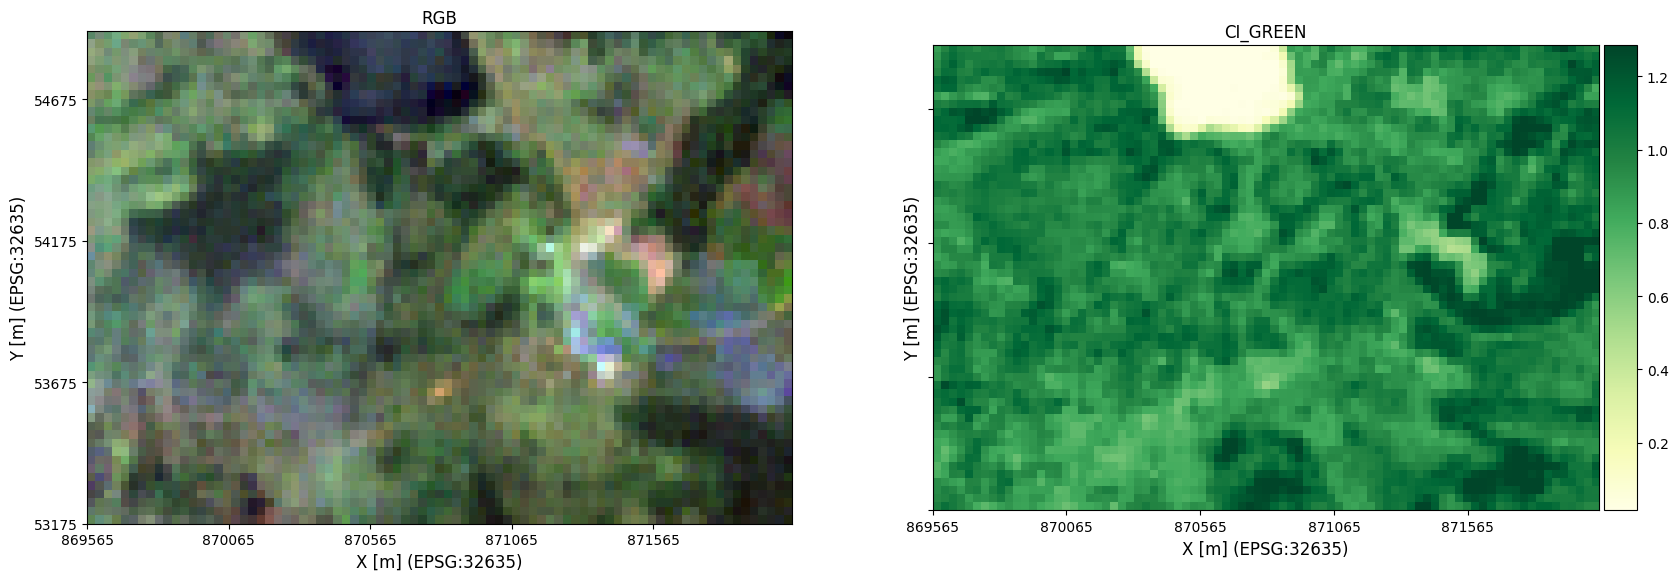

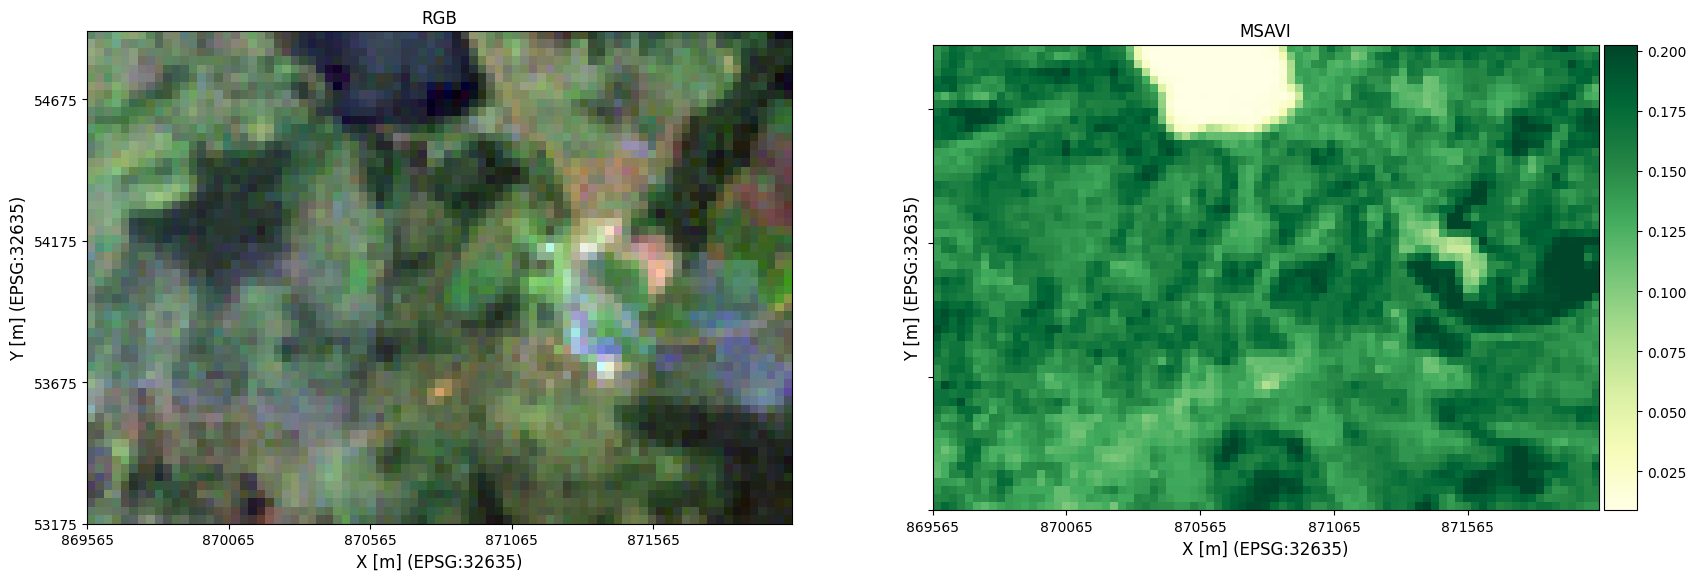

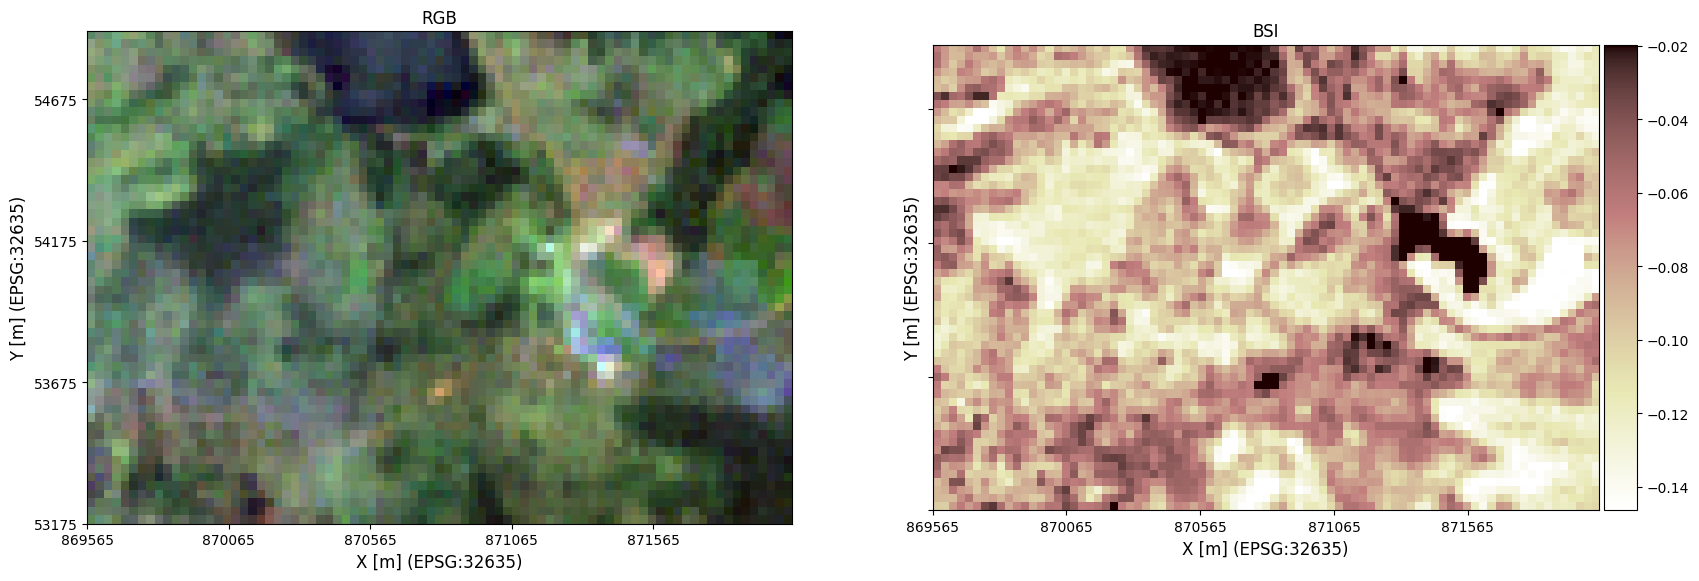

In [39]:
#plot bands:
fig, axs = plt.subplots(1, 2, figsize = (20, 10), sharey=True)
composite.plot_multiple_bands(["red_median", "green_median", "blue_median"], ax=axs[0])
axs[0].set_title("RGB")
composite.plot_multiple_bands(["nir08_median", "red_median", "green_median"], ax=axs[1])
axs[1].set_title("false-color composite")

for band in composite.band_names:
    fig, axs = plt.subplots(1, 2, figsize = (20, 10), sharey=True)
    composite.plot_multiple_bands(["red", "green", "blue"], ax=axs[0])
    axs[0].set_title("RGB")
    if band == 'blue_median':
        composite.plot_band(band, colormap="Blues", ax=axs[1])
        axs[1].set_title(band)
    if band == 'green_median':
        composite.plot_band(band, colormap="Greens", ax=axs[1])
        axs[1].set_title(band)
    if band == 'red_median':
        composite.plot_band(band, colormap="Reds", ax=axs[1])
        axs[1].set_title(band)
    if band == 'nir08_median':
        composite.plot_band(band, colormap="Greys_r", ax=axs[1])
        axs[1].set_title(band)
    if band == 'swir16_median':
        composite.plot_band(band, colormap="Greys_r", ax=axs[1])
        axs[1].set_title(band)
    if band == 'NDVI':
        composite.plot_band(band, colormap="YlGn", ax=axs[1])
        axs[1].set_title(band)
    if band == 'NDWI':
        composite.plot_band(band, colormap="GnBu", ax=axs[1])
        axs[1].set_title(band)
    if band == 'EVI':
        composite.plot_band(band, colormap="YlGn", ax=axs[1])
        axs[1].set_title(band)
    if band == 'CI_GREEN':
        composite.plot_band(band, colormap="YlGn", ax=axs[1])
        axs[1].set_title(band)
    if band == 'MSAVI':
        composite.plot_band(band, colormap="YlGn", ax=axs[1])
        axs[1].set_title(band)
    if band == 'BSI':
        composite.plot_band(band, colormap="pink_r", ax=axs[1])
        axs[1].set_title(band)


In [40]:
# Create a DataFrame from the RasterCollection
gdf = composite.to_dataframe()

# # Extract x and y coordinates into new columns
# gdf['x_coordinate'] = gdf['geometry'].apply(lambda point: Point(point).x)
# gdf['y_coordinate'] = gdf['geometry'].apply(lambda point: Point(point).y)

# Select all columns except the first one (geometry is non-numeric)
selected_columns = ['blue_median', 'green_median', 'red_median', 'nir08_median','swir16_median', 'NDVI', 'NDWI', 'EVI', 'CI_GREEN', 'MSAVI', 'BSI']
columns_to_scale = ['blue_median', 'green_median', 'red_median', 'nir08_median','swir16_median']

gdf[selected_columns].head()

,blue_median,green_median,red_median,nir08_median,swir16_median,NDVI,NDWI,EVI,CI_GREEN,MSAVI,BSI
0,0.084460,0.093480,0.087800,0.173950,0.139660,0.329131,-0.300901,0.201794,0.860826,0.142999,-0.063700
1,0.086500,0.095680,0.093760,0.181570,0.145560,0.318926,-0.309793,0.200410,0.897680,0.144059,-0.056663
2,0.085820,0.096340,0.094460,0.186030,0.147450,0.326464,-0.317633,0.206399,0.930974,0.149842,-0.058276
3,0.085850,0.095635,0.093815,0.188185,0.141835,0.334645,-0.326087,0.213083,0.967742,0.154464,-0.075311
4,0.084485,0.094195,0.092155,0.197755,0.143165,0.364251,-0.354718,0.236337,1.099421,0.172720,-0.090656


In [41]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Extract the feature columns from the GeoDataFrame into a NumPy array
features = gdf[columns_to_scale].values

# Step 2: Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Step 3: Fit the scaler to the feature data
scaler.fit(features)

# Step 4: Transform the feature data using the fitted scaler
scaled_features = scaler.transform(features)

# Step 5: Replace the original feature values in the GeoDataFrame with the scaled values
gdf[columns_to_scale] = scaled_features
gdf[selected_columns].head()

,blue_median,green_median,red_median,nir08_median,swir16_median,NDVI,NDWI,EVI,CI_GREEN,MSAVI,BSI
0,0.404047,0.529587,0.349086,0.640370,0.622460,0.329131,-0.300901,0.201794,0.860826,0.142999,-0.063700
1,0.537206,0.638986,0.564910,0.695244,0.680940,0.318926,-0.309793,0.200410,0.897680,0.144059,-0.056663
2,0.492820,0.671805,0.590259,0.727361,0.699673,0.326464,-0.317633,0.206399,0.930974,0.149842,-0.058276
3,0.494778,0.636748,0.566902,0.742880,0.644018,0.334645,-0.326087,0.213083,0.967742,0.154464,-0.075311
4,0.405679,0.565142,0.506790,0.811796,0.657201,0.364251,-0.354718,0.236337,1.099421,0.172720,-0.090656


In [42]:
# print band summaries
composite.band_summaries()

,min,mean,std,max,count,geometry,band_name
0,0.078270,0.083210,0.001912,0.093590,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",blue_median
1,0.082830,0.091133,0.002921,0.102940,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",green_median
2,0.078160,0.087398,0.003729,0.105775,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",red_median
3,0.085025,0.177960,0.021257,0.223890,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",nir08_median
4,0.076860,0.131254,0.014245,0.177750,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",swir16_median
5,0.010393,0.336121,0.068067,0.449485,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",NDVI
6,-0.422427,-0.317482,0.066498,0.013938,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",NDWI
7,0.004593,0.209054,0.047050,0.304082,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",EVI
8,-0.027494,0.951932,0.225192,1.462764,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",CI_GREEN
9,0.003065,0.149985,0.034345,0.223706,4814.0,"POLYGON ((872055.000 53175.000, 872055.000 549...",MSAVI


C:\Users\finnt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\finnt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\finnt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

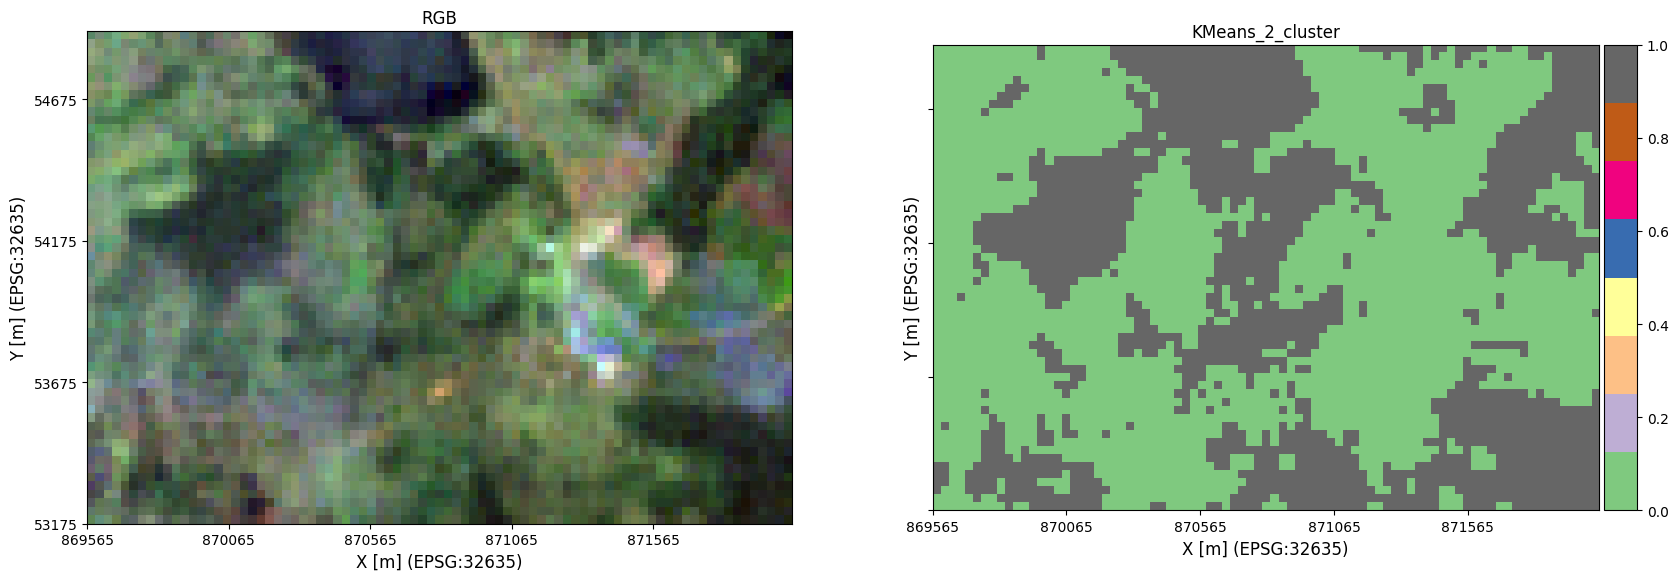

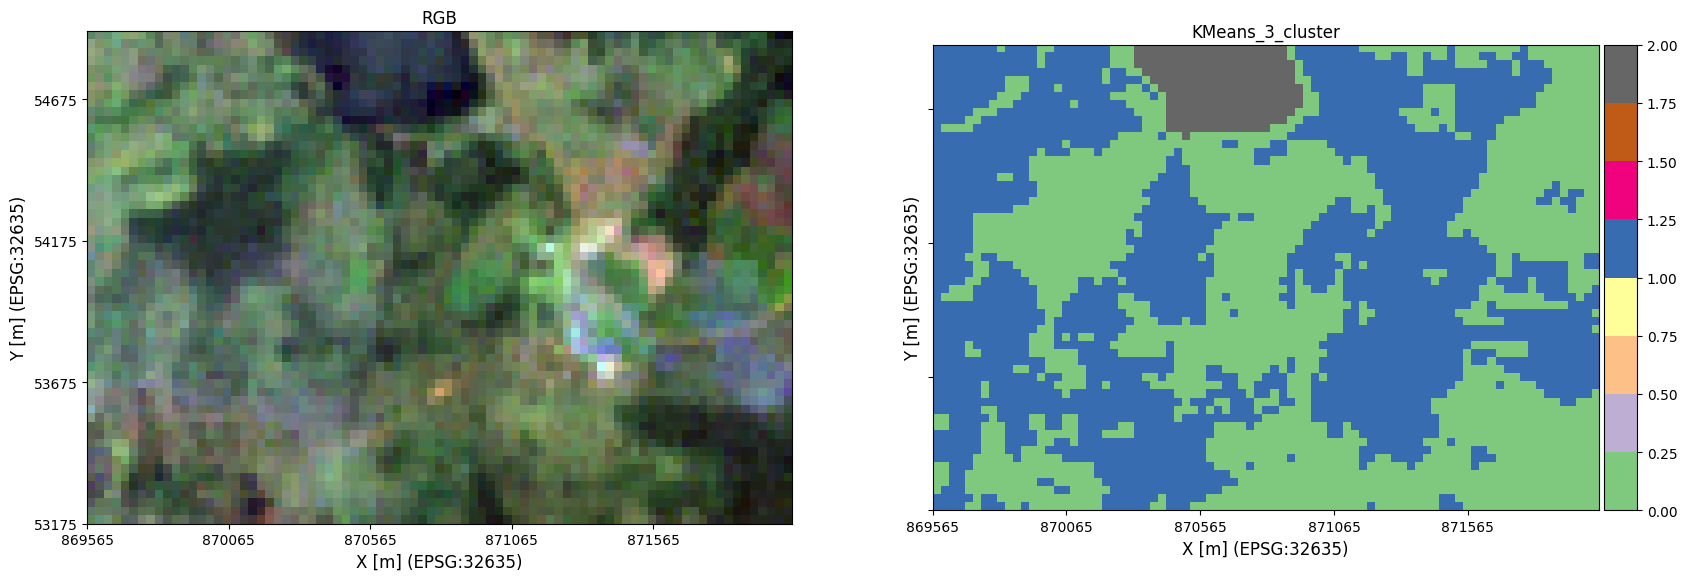

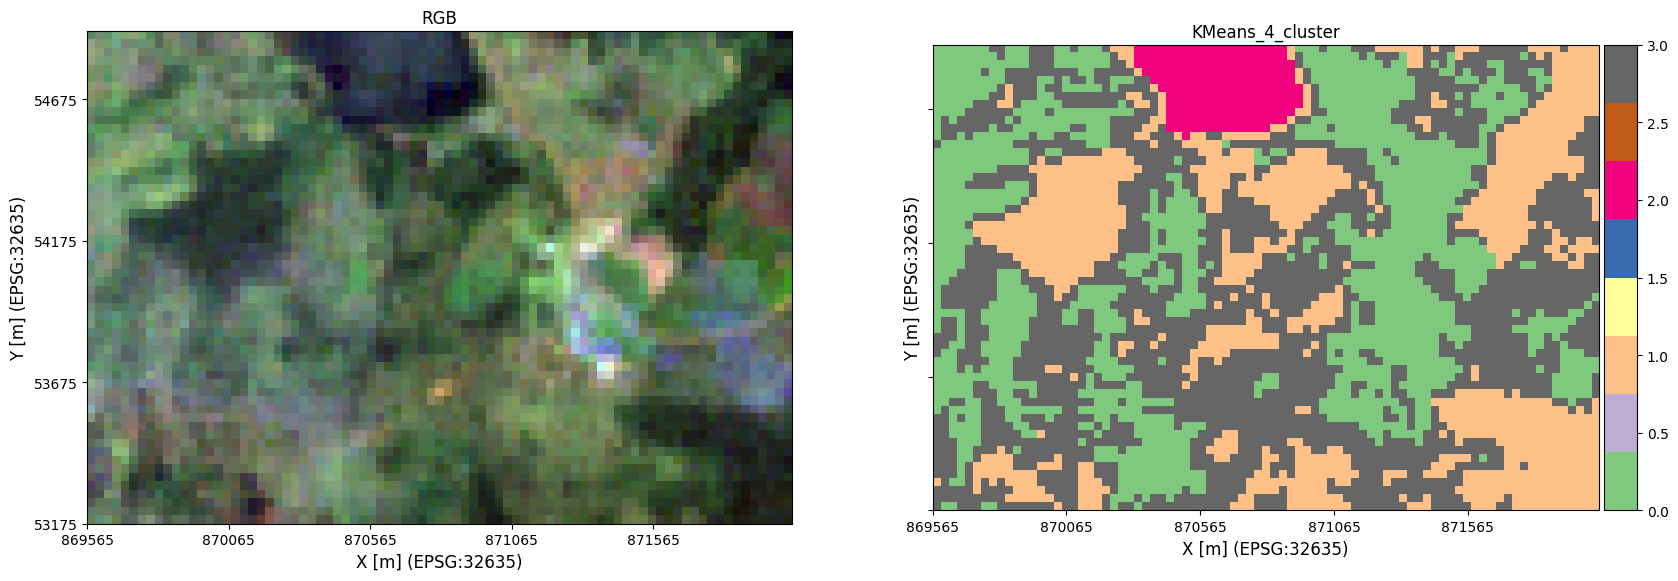

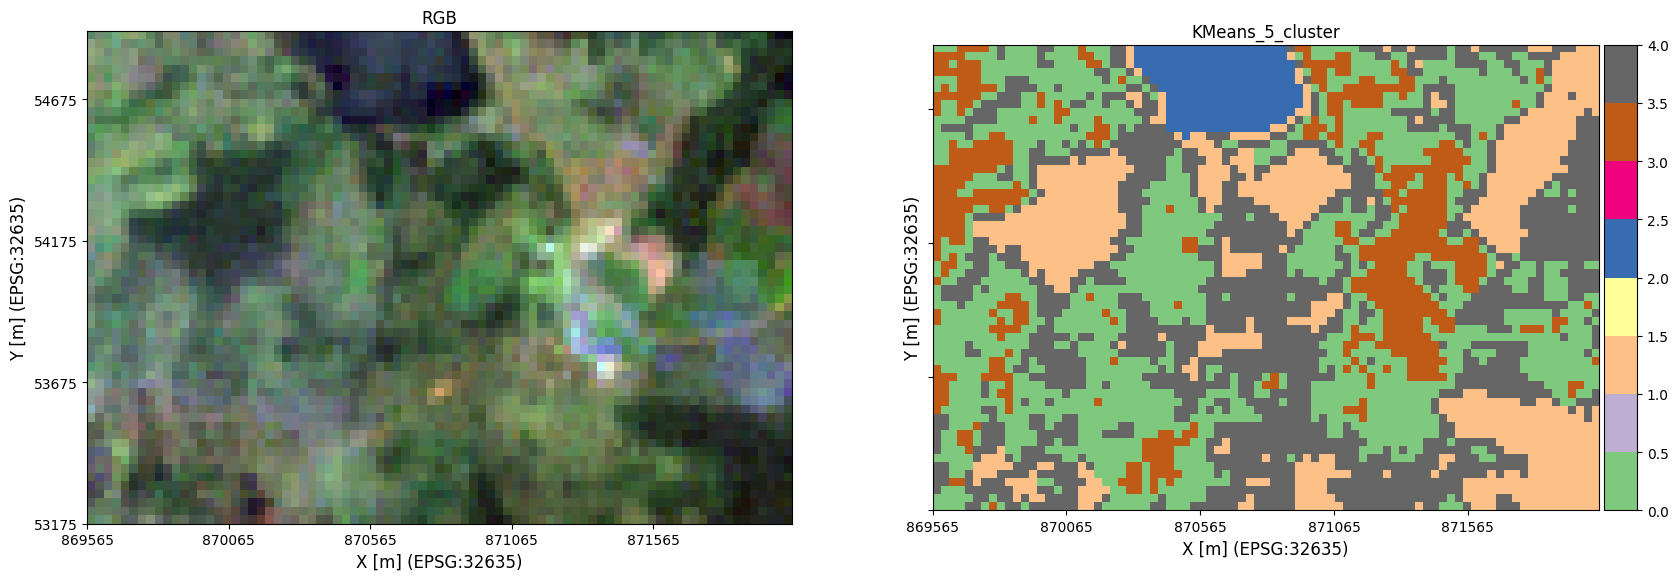

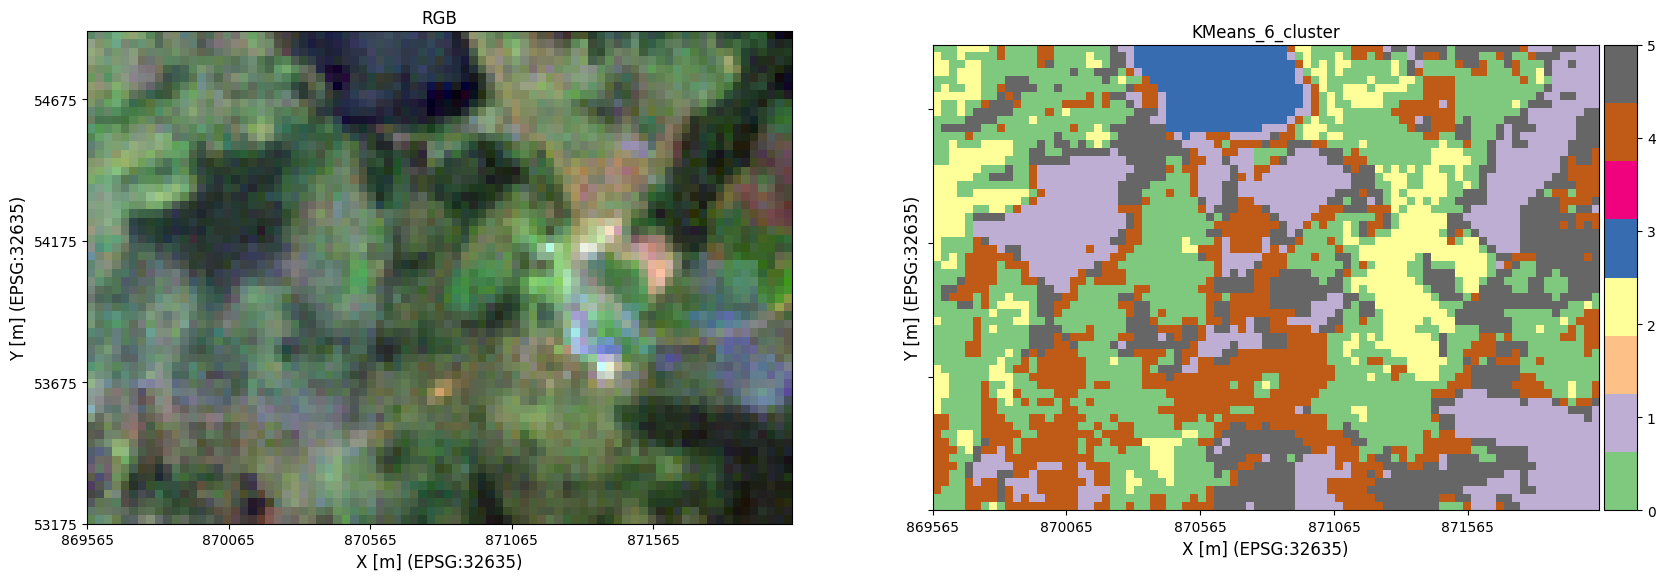

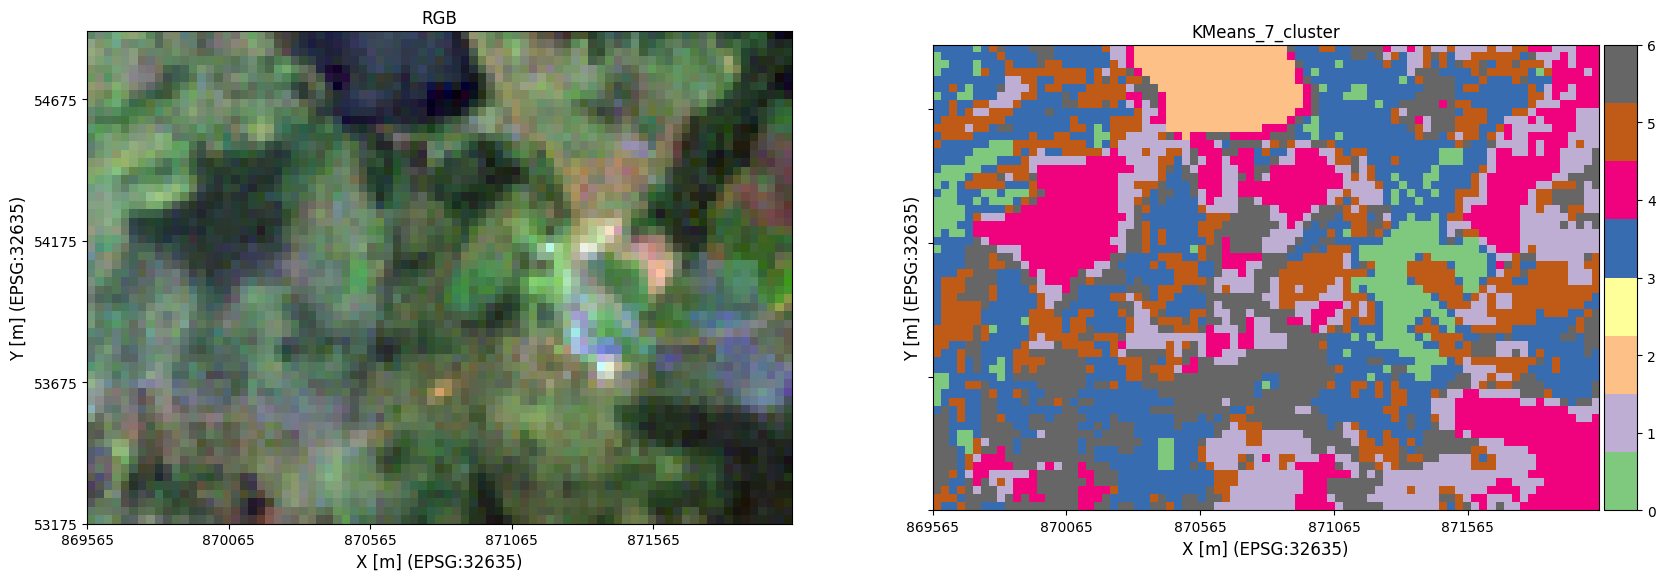

In [43]:
## Use K-means for Clustering:

# set the desired number of clusters for KMean and GMM

for n in range(2, 8, 1):

    # create model
    km = KMeans(n_clusters = n) 

    # fit the model to the data
    km.fit(scaled_features)

    # Get the cluster labels
    labels = km.labels_

    # Add the cluster labels to the DataFrame and show it
    gdf[str("KMeans_" + str(n) + "_cluster")] = labels

    # # Feature relevance assessment
    # centroid_values = km.cluster_centers_  # Centroid values for each feature within each cluster

    # # Calculate the range of values for each feature
    # feature_ranges = np.ptp(scaled_features, axis=0)

    # # Calculate the relative feature relevance
    # feature_relevance = centroid_values * feature_ranges

    # # Print the feature relevance for each cluster
    # for cluster_id, relevance_scores in enumerate(feature_relevance):
    #     print(f"Cluster {cluster_id + 1}:")
    #     for feature_id, score in enumerate(relevance_scores):
    #         print(f"Feature {selected_columns[feature_id]}: {score}")
    #     print()
        
    # create new band instance from a column in GeoDataFrame
    KMeans_cluster = Band.from_vector(vector_features = gdf,
                                 band_name_src = str("KMeans_" + str(n) + "_cluster"),
                                 geo_info = composite['blue'].geo_info,
                                 band_name_dst = str("KMeans_" + str(n) + "_cluster")
                                 )

    #add column cluster_label as a new Band into the RasterCollection composite
    composite.add_band(KMeans_cluster)
    
    fig, axs = plt.subplots(1, 2, figsize = (20, 10), sharey=True)

    composite.plot_multiple_bands(["red", "green", "blue"], ax=axs[0])
    axs[0].set_title("RGB")

    composite.plot_band(str("KMeans_" + str(n) + "_cluster"), colormap="Accent", ax=axs[1])
    axs[1].set_title(str("KMeans_" + str(n) + "_cluster"))
    
    #save as PNG for quick view
    fig.savefig(str("S:\MSc_23_TimckeFinn\data\python_outputs\cluster\KMeans_" + str(n) + "_cluster_" + str(year) + ".png"))
    

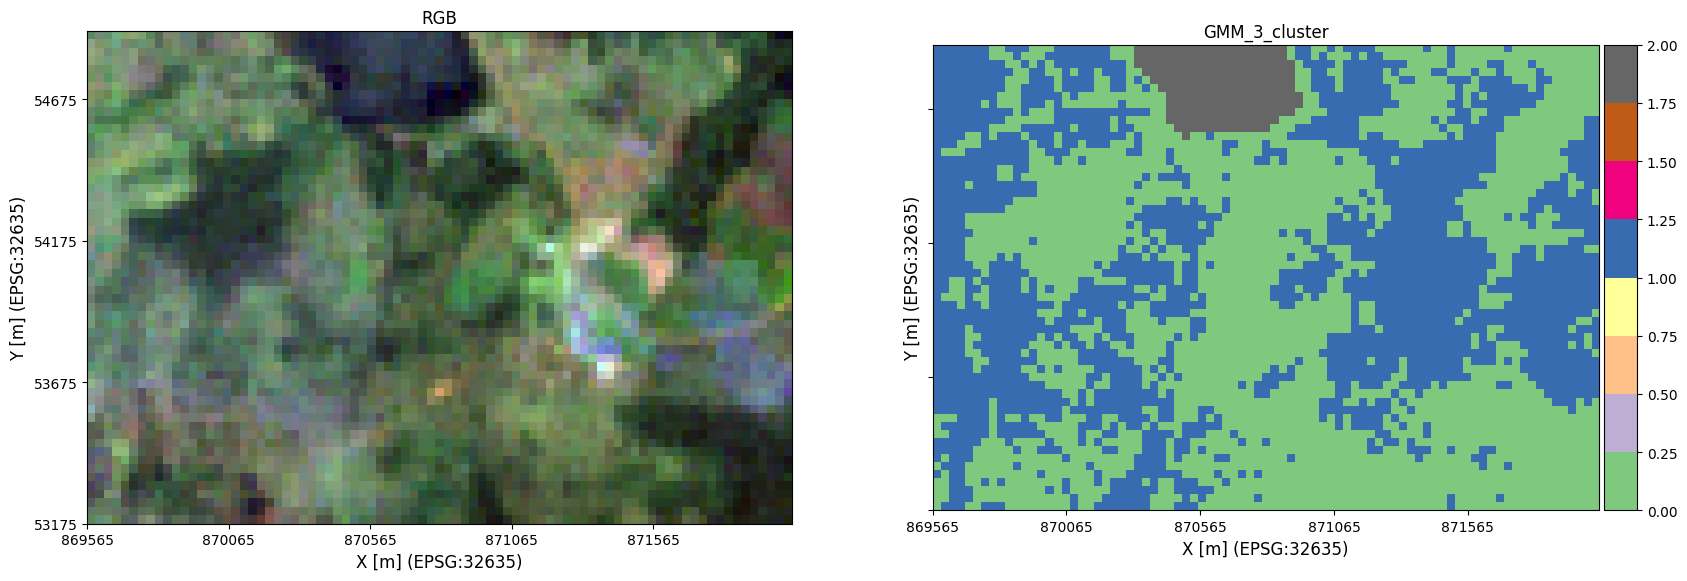

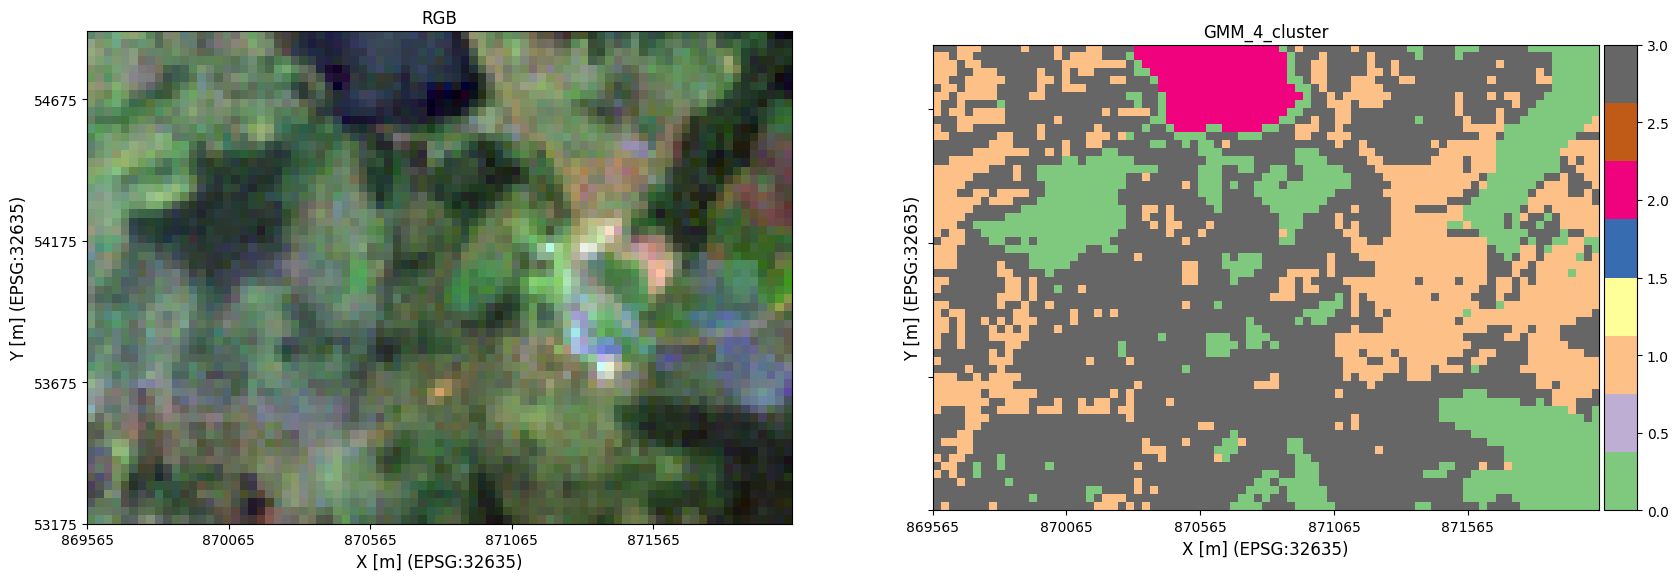

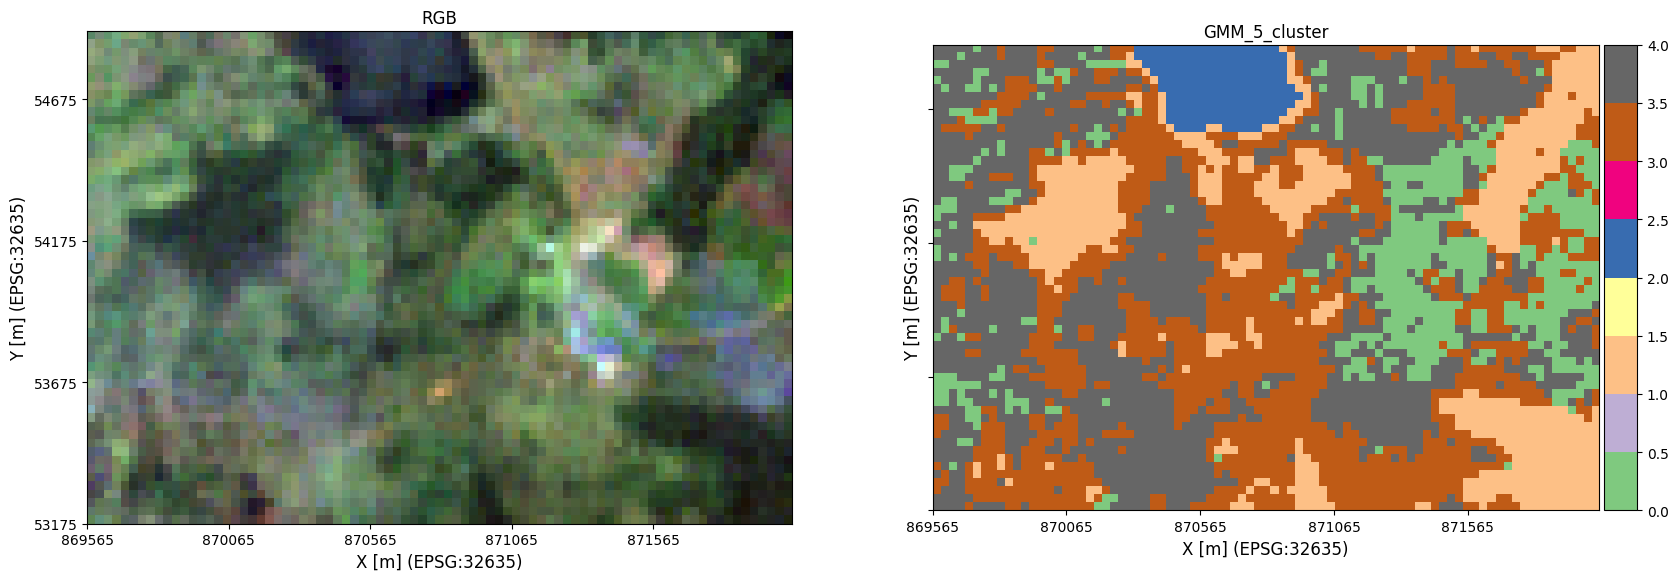

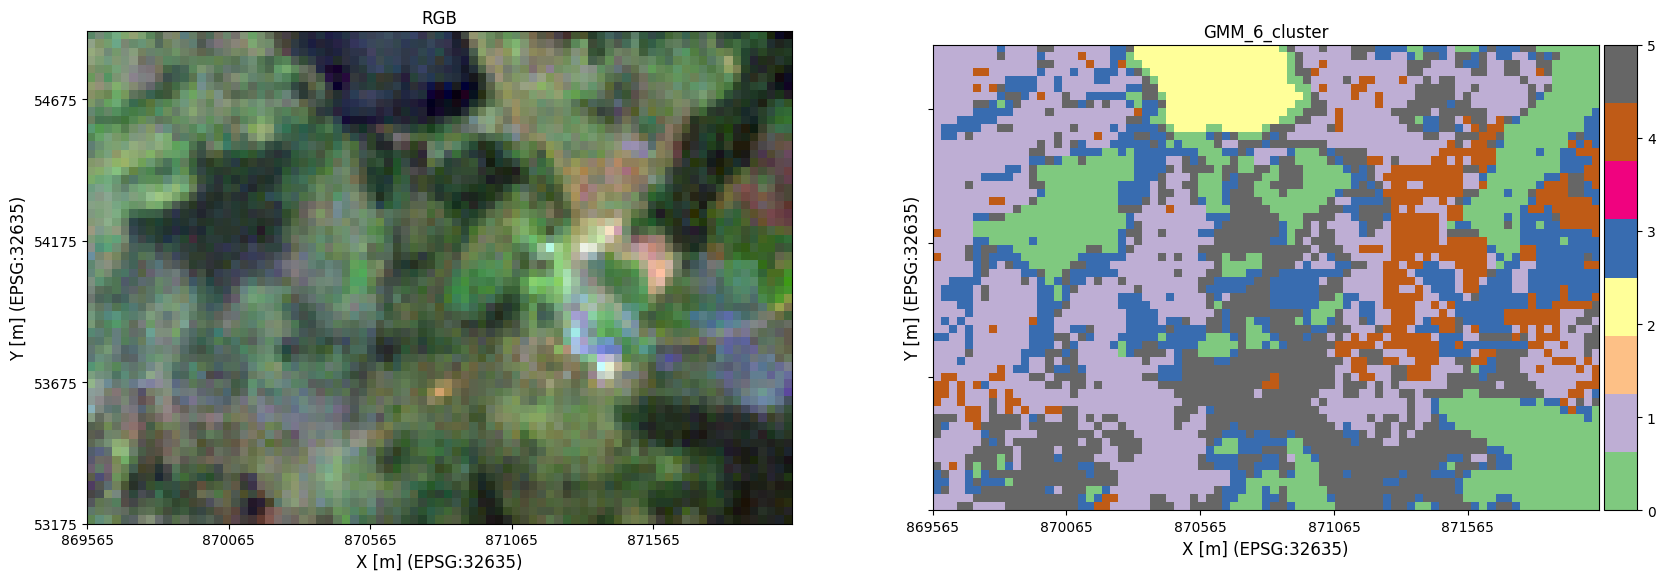

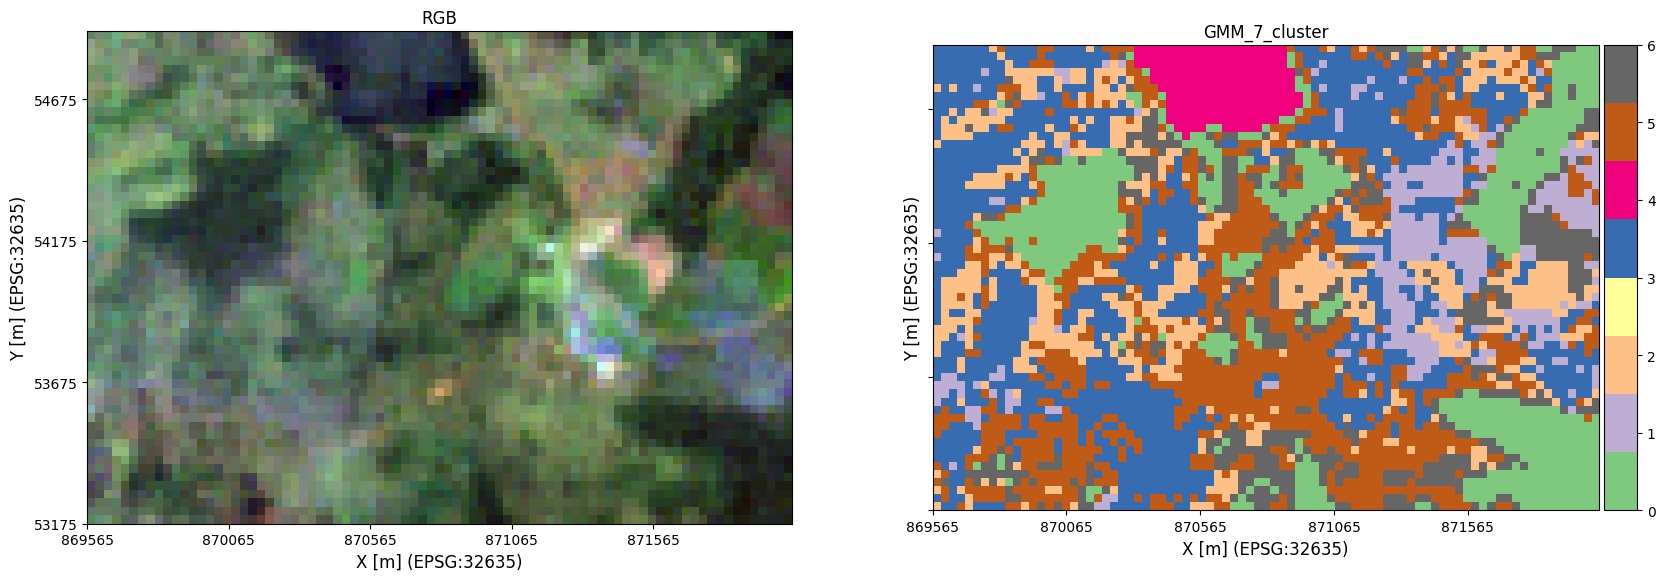

In [44]:
## Use Gaussian Mixture Models for Clustering:

for n in range(3, 8, 1):

    # create model
    gmm = GaussianMixture(n_components = n)

    # fit the model to the data
    gmm.fit(scaled_features)

    # Assign cluster labels
    GMM_cluster = gmm.predict(scaled_features)

    # Assign cluster labels to GeoDataFrame
    gdf[str("GMM_" + str(n) + "_cluster")] = GMM_cluster

    # add column cluster_mean_shift as a new Band into the RasterCollection composite
    GMM_cluster = Band.from_vector(vector_features = gdf,
                                    band_name_src = str("GMM_" + str(n) + "_cluster"),
                                    geo_info = composite['blue'].geo_info,
                                    band_name_dst = str("GMM_" + str(n) + "_cluster"))

    composite.add_band(GMM_cluster)
    
    fig, axs = plt.subplots(1, 2, figsize = (20, 10), sharey=True)

    composite.plot_multiple_bands(["red", "green", "blue"], ax=axs[0])
    axs[0].set_title("RGB")

    composite.plot_band(str("GMM_" + str(n) + "_cluster"), colormap="Accent", ax=axs[1])
    axs[1].set_title(str("GMM_" + str(n) + "_cluster"))
    
    #save as PNG for quick view
    fig.savefig(str("S:\MSc_23_TimckeFinn\data\python_outputs\cluster\GMM_" + str(n) + "_cluster_" + str(year) + ".png"))

In [ ]:
## Use MeanShift for Clustering:

# set the desired number of clusters for the MeanShift clustering
# bandwidth = 8 

# create model
#ms = MeanShift(bandwidth=bandwidth)

# fit the model to the data
#ms.fit(normalized_features)

# Assign cluster labels
#cluster_labels = ms.labels_

# Assign cluster labels to GeoDataFrame
#gdf['MeanShift_cluster'] = cluster_labels

# add column cluster_mean_shift as a new Band into the RasterCollection composite
#MeanShift_cluster = Band.from_vector(vector_features = gdf,
                                 #band_name_src = 'MeanShift_cluster',
                                 #geo_info = composite['blue'].geo_info,
                                 #band_name_dst='MeanShift_cluster')

#composite.add_band(MeanShift_cluster)

#save as PNG for quick view
#fig.savefig(str("S:\MSc_23_TimckeFinn\data\python_outputs\cluster\MS_cluster_" + str(year) + ".png"))


In [ ]:
# save as GeoTiff
composite.to_rasterio('S:\MSc_23_TimckeFinn\data\EOdal\landsat_median_composite_cluster_' + str(year) + '.tif')